In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [5]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Data Reshape

In [6]:
X_train_full = X_train_full.reshape((60000,28,28,1))

In [7]:
X_test = X_test.reshape((10000,28,28,1))

## Data normalization
We then normalize the data dimensions so that they are of approximately the same scale

In [8]:
X_train_n = X_train_full/255
X_test_n = X_test/255

## Split the data into train/validation/test datasets

In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now wee further split the training data into train/validation.Here is how each type of datasets is used in deep learning

1. Training data - used for training the model 
2. Validation data - used for tuning the hyperparameter and evalute the models 
3. Test data - used to test the model after the model has gone through initial vetting by the validation set.

In [9]:
X_valid,X_train = X_train_n[:5000],X_train_n[5000:]

In [10]:
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [11]:
X_test = X_test_n

## Create  the model architecture

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size =(3,3), strides=1,padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))



In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [19]:
model_history = model.fit(X_train,y_train, epochs=10, batch_size=64,
                          validation_data = (X_valid,y_valid))

Epoch 1/10
860/860 [==============================] - 35s 40ms/step - loss: 0.8768 - accuracy: 0.6987 - val_loss: 0.7487 - val_accuracy: 0.7346
Epoch 2/10
860/860 [==============================] - 34s 39ms/step - loss: 0.5388 - accuracy: 0.8051 - val_loss: 0.4919 - val_accuracy: 0.8196
Epoch 3/10
860/860 [==============================] - 34s 40ms/step - loss: 0.4811 - accuracy: 0.8256 - val_loss: 0.9141 - val_accuracy: 0.7104
Epoch 4/10
860/860 [==============================] - 34s 39ms/step - loss: 0.4441 - accuracy: 0.8417 - val_loss: 0.4169 - val_accuracy: 0.8568
Epoch 5/10
860/860 [==============================] - 34s 39ms/step - loss: 0.4200 - accuracy: 0.8498 - val_loss: 0.4365 - val_accuracy: 0.8466
Epoch 6/10
860/860 [==============================] - 34s 40ms/step - loss: 0.3957 - accuracy: 0.8581 - val_loss: 0.3765 - val_accuracy: 0.8714
Epoch 7/10
860/860 [==============================] - 34s 40ms/step - loss: 0.3782 - accuracy: 0.8659 - val_loss: 0.4075 - val_accuracy:

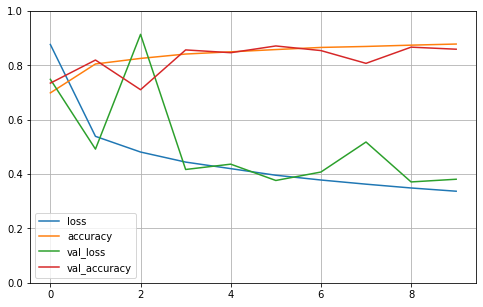

In [20]:
import pandas as pad

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
ev = model.evaluate(X_test_n,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.4135 - accuracy: 0.8460


In [22]:
ev

[0.41349175572395325, 0.8460000157356262]

In [23]:
X_new = X_test[:3]

In [24]:
y_pred = model.predict_classes(X_new)
y_pred


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [25]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


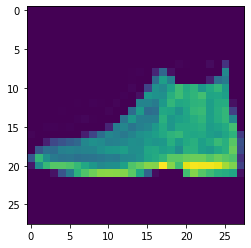

In [28]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [29]:
keras.backend.clear_session


<function tensorflow.python.keras.backend.clear_session()>

In [30]:
del model